In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix


# After Importing all our libraries, let us get our dataset and do some data cleaning and exploration.

In [42]:
df1=pd.read_csv('test_survival.csv')
df2 = pd.read_csv('test.csv')
df3 = pd.read_csv('train.csv')



In [43]:
df2.shape

(418, 11)

In [44]:
df3.shape

(891, 12)

In [45]:
df2.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
df3.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# We drop some columns that are not required for our model training in both our training and test dataset

In [47]:
df2_ed=df2.drop(['Name','SibSp', 'Parch','Ticket','Fare','Cabin', 'PassengerId'], axis='columns')

df2_ed.head(10)

,Pclass,Sex,Age,Embarked
0,3,male,34.5,Q
1,3,female,47.0,S
2,2,male,62.0,Q
3,3,male,27.0,S
4,3,female,22.0,S
5,3,male,14.0,S
6,3,female,30.0,Q
7,2,male,26.0,S
8,3,female,18.0,C
9,3,male,21.0,S


In [48]:
df3_ed=df3.drop(['Name','SibSp', 'Parch','Ticket','Fare','Cabin','PassengerId'], axis='columns')

df3_ed.head(10)

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
5,0,3,male,NaN,Q
6,0,1,male,54.0,S
7,0,3,male,2.0,S
8,1,3,female,27.0,S
9,1,2,female,14.0,C


# We display basic info of our dataset, find and either replace or drop null values. 

In [49]:
# Display basic info
print("Dataset Overview:")
print(df3_ed.info())
print("\nFirst few rows:")
print(df3_ed.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB
None

First few rows:
   Survived  Pclass     Sex   Age Embarked
0         0       3    male  22.0        S
1         1       1  female  38.0        C
2         1       3  female  26.0        S
3         1       1  female  35.0        S
4         0       3    male  35.0        S


In [50]:
# Checking for missing values
print("\nMissing Values:")
print(df3_ed.isnull().sum())


Missing Values:
Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64


In [51]:
average_age = df3_ed['Age'].mean()
print(average_age)


29.69911764705882


In [52]:
# filling NaN values with mean age
df3_ed['Age'] = df3_ed['Age'].fillna(average_age)

In [53]:
# Dropping the two null values on Embark column. Will Not affect our model.

df3_ed = df3_ed.dropna(subset=['Embarked'])


In [54]:
# Checking for missing values again
print("\nMissing Values:")
print(df3_ed.isnull().sum())


Missing Values:
Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64


# We perform some basic Data Analysis

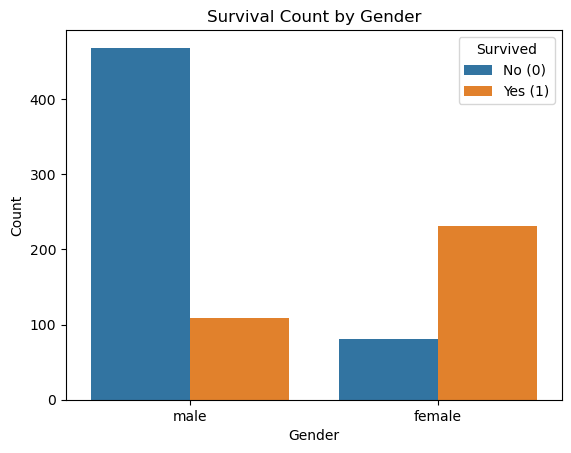

In [55]:
sns.countplot(data=df3_ed, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.show()

## 🧠 Survival Analysis by Gender on Titanic Dataset

The bar chart **"Survival Count by Gender"** reveals a clear disparity in survival rates between male and female passengers:

- **Male Passengers**:
  - A significantly **higher number of males did not survive**.
  - Only a **small fraction** of male passengers survived.

- **Female Passengers**:
  - The **majority of female passengers survived**.
  - Very few females were among the deceased.

### 🔍 Key Insights:

- **Gender played a major role** in survival during the Titanic disaster.
- The survival policy of "**women and children first**" is reflected in this data.
- This implies that gender is a **strong predictive feature** in survival modeling for this dataset.

### 📌 Conclusion:

The Titanic dataset shows **clear gender-based survival bias**, with females having a **much higher chance of survival** compared to males. 

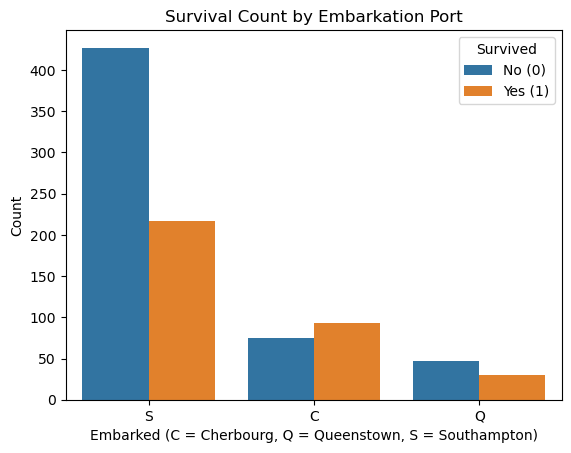

In [56]:
sns.countplot(data=df3_ed, x='Embarked', hue='Survived')
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.show()

## 🚢 Survival Analysis by Embarkation Port

The bar chart **"Survival Count by Embarkation Port"** compares survival counts of passengers based on their port of embarkation:

### 🗺 Port Breakdown:
- **S = Southampton**
- **C = Cherbourg**
- **Q = Queenstown**

### 🔍 Observations:

- **Southampton (S)**:
  - Had the **highest number of passengers**.
  - Also recorded the **highest number of deaths**.
  - Survival count is substantial, but **less than deaths**.

- **Cherbourg (C)**:
  - Had **fewer passengers** compared to Southampton.
  - Interestingly, more passengers **survived than died**.
  - Suggests Cherbourg passengers may have had **better class tickets or cabin access**.

- **Queenstown (Q)**:
  - Had the **fewest passengers overall**.
  - Survival and death counts are both **relatively low**, but **deaths slightly exceed survivals**.

### 📌 Conclusion:


The port of embarkation appears to have some correlation with survival, possibly reflecting underlying factors like **passenger class, cabin location, or socioeconomic status**. Passengers from Cherbourg had a notably **higher survival rate**, while Southampton had the **highest casualty rate** due to its larger boarding population.


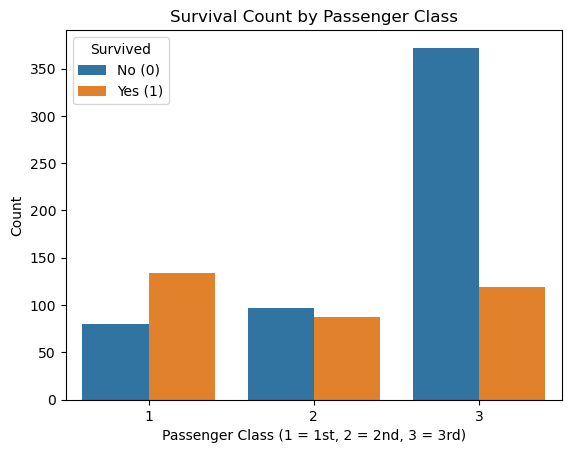

In [57]:
sns.countplot(data=df3_ed, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.show()

## 🎫 Survival Analysis by Passenger Class

The bar chart **"Survival Count by Passenger Class"** provides insights into how survival varied among passengers in different classes:

### 🚶‍♂️ Passenger Class Meaning:
- **1 = 1st Class** (Upper class)
- **2 = 2nd Class** (Middle class)
- **3 = 3rd Class** (Lower class)

### 🔍 Observations:

- **1st Class**:
  - **More passengers survived than died**, indicating the **highest survival rate**.
  - Suggests priority treatment and better access to lifeboats.

- **2nd Class**:
  - Survival and death counts are **almost balanced**, showing a **moderate chance of survival**.

- **3rd Class**:
  - **Largest group of passengers**, but **majority did not survive**.
  - Indicates **lowest survival rate**, possibly due to poorer cabin location and less priority during evacuation.

### 📌 Conclusion:

Passenger class strongly influenced survival chances on the Titanic. **1st class passengers had the best survival rates**, while **3rd class passengers were the most vulnerable**. This highlights how **social and economic status** affected life-saving access during the disaster.


# Let us do some data cleaning for our test dataset 

In [58]:
# checking null Values for our test datasets

print("\nMissing Values:")
print(df2_ed.isnull().sum())


Missing Values:
Pclass       0
Sex          0
Age         86
Embarked     0
dtype: int64


In [59]:
average_age = df2_ed['Age'].mean()
print(average_age)


30.272590361445783


In [60]:
# filling NaN values with mean age
df2_ed['Age'] = df2_ed['Age'].fillna(average_age)

In [61]:
print("\nMissing Values:")
print(df2_ed.isnull().sum())


Missing Values:
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64


# Create a dummy variables for our string values and drop one column to avoid dummy variable trap

In [62]:

# Create dummy variables for 'Sex' with both 'male' and 'female' columns
dummies = pd.get_dummies(df2_ed['Sex'], drop_first=False).astype(int)

# Merge with original DataFrame
merged = pd.concat([df2_ed, dummies], axis='columns')

# Drop the original 'Sex' and 'Embarked' to avoid dummy variable trap
test = merged.drop(['Sex', 'Embarked'], axis='columns')

# Preview
test.head(10)






,Pclass,Age,female,male
0,3,34.5,0,1
1,3,47.0,1,0
2,2,62.0,0,1
3,3,27.0,0,1
4,3,22.0,1,0
5,3,14.0,0,1
6,3,30.0,1,0
7,2,26.0,0,1
8,3,18.0,1,0
9,3,21.0,0,1


In [63]:
# Create dummy variables for 'Sex' with both 'male' and 'female' columns
dummies = pd.get_dummies(df3_ed['Sex'], drop_first=False).astype(int)

# Merge with original DataFrame
merged = pd.concat([df3_ed, dummies], axis='columns')

# Drop the original 'Sex' and 'Embarked' to avoid dummy variable trap
train = merged.drop(['Sex', 'Embarked'], axis='columns')

# Preview
train.head(10)

,Survived,Pclass,Age,female,male
0,0,3,22.000000,0,1
1,1,1,38.000000,1,0
2,1,3,26.000000,1,0
3,1,1,35.000000,1,0
4,0,3,35.000000,0,1
5,0,3,29.699118,0,1
6,0,1,54.000000,0,1
7,0,3,2.000000,0,1
8,1,3,27.000000,1,0
9,1,2,14.000000,1,0


# Train our model using support Vector Algorithm (using the best parameters), we use our test dataset to get the accuracy score and introduce confusion matrix then plot a heatmap. We then make a prediction to see how our model works.

In [64]:

x=train.drop (['Survived'], axis='columns')
y=train.Survived
model=SVC (C=10, gamma=100, kernel='linear')
model.fit(x,y)



SVC(C=10, gamma=100, kernel='linear')

✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418


🧮 Confusion Matrix:
 [[266   0]
 [  0 152]]


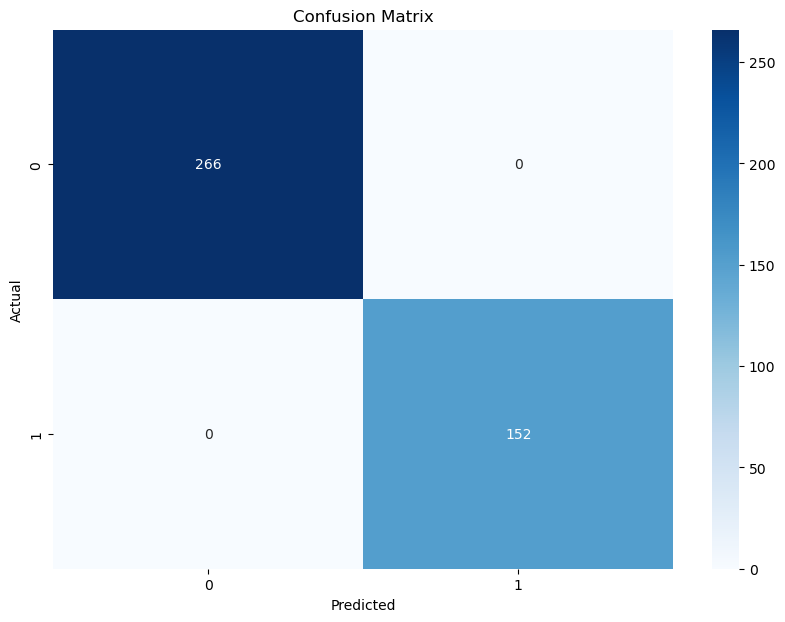

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Separate features and labels
x_test = test[['Pclass', 'Age', 'female', 'male']]
y_test = df1['Survived']

# 2. Make predictions
y_pred = model.predict(x_test)

# 3. Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#visualizing Confusion Matrix

# 1. Get confusion matrix values (don't confuse with function name!)
cm = confusion_matrix(y_test, y_pred)

# 2. Plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [66]:
# Let us make our own prediction 


# 1. Create a DataFrame for the new passenger
new_passenger = pd.DataFrame([{
    'Pclass': 1,
    'Age': 25,
    'female': 1,
    'male': 0
}])

# 2. Use the trained model to predict
prediction = model.predict(new_passenger)

# 3. Output result
print("Prediction:", "Survived" if prediction[0] == 1 else "Did Not Survive")

Prediction: Survived
